In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random 
import pandas as pd
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
test = pd.read_csv('/drive/My Drive/Colab Notebooks/PR_lab_Assignments/Assignment3/test-Minimum-Error-Rate-Classifier.txt',sep=',', header = None)
test

,0,1
0,1,1.0
1,1,-1.0
2,4,5.0
3,-2,2.5
4,0,2.0
5,2,-3.0


In [ ]:
test_list = []
for i in range(len(test)):
  test_list.append([test[0][i],test[1][i]])

test_list

[[1, 1.0], [1, -1.0], [4, 5.0], [-2, 2.5], [0, 2.0], [2, -3.0]]

In [ ]:
class1 = []
class2 = []
meu1 = [0,0]
meu2 = [2,2]
sigma1 = [[0.25, 0.3],[0.3,1]]
sigma2 = [[0.5,0],[0,0.5]]
prior1 = 0.5
prior2 = 0.5
D = 2
pi = 3.1416

In [ ]:
for i in range(len(test_list)):

  divide_term1 =  1 / (((2 * pi) ** (D/2)) * ( (np.linalg.det(sigma1)**(1/2)) ))  
  exp_term1 = -0.5 * np.matmul(np.transpose(np.subtract(test_list[i] , meu1) ), np.matmul(np.linalg.inv(sigma1), (np.subtract(test_list[i] , meu1)) ))
  normal_dist1 = divide_term1 * (np.exp(exp_term1))


  divide_term2 =   1 / (((2 * pi) ** (D/2)) * ( (np.linalg.det(sigma2)**(1/2)) ))   
  exp_term2 = -0.5 * np.matmul(np.transpose(np.subtract(test_list[i] , meu2)), np.matmul(np.linalg.inv(sigma2), (np.subtract(test_list[i] , meu2) ) ))
  normal_dist2 = divide_term2 * (np.exp(exp_term2))

  posterior1 = normal_dist1 * prior1
  posterior2 = normal_dist2 * prior2

  print("i: ", i )
  print("P1: ", posterior1)
  print("P2: ", posterior2)
  print("\n")

  if (posterior1 > posterior2) :
    class1.append([test[0][i],test[1][i]])
  else :
     class2.append([test[0][i],test[1][i]])

i:  0
P1:  0.026095670659495616
P2:  0.02153922893376189


i:  1
P1:  0.0006137113505121325
P2:  7.225606341113582e-06


i:  2
P1:  2.4419344715058477e-15
P2:  3.597417569042931e-07


i:  3
P1:  4.763858053504574e-13
P2:  1.3948701647955878e-08


i:  4
P1:  0.008740954772927695
P2:  0.002915017648448908


i:  5
P1:  8.5231887852038e-15
P2:  2.2103297467793515e-12




In [ ]:
print(class1)
print(class2)


[[1, 1.0], [1, -1.0], [0, 2.0]]
[[4, 5.0], [-2, 2.5], [2, -3.0]]


In [ ]:
class1_x = []
class1_y = []
for i in range(len(class1)):
  class1_x.append(class1[i][0])
  class1_y.append(class1[i][1])
class1_x

[1, 1, 0]

In [ ]:
class2_x = []
class2_y = []
for i in range(len(class2)):
  class2_x.append(class2[i][0])
  class2_y.append(class2[i][1])
class2_x

[4, -2, 2]

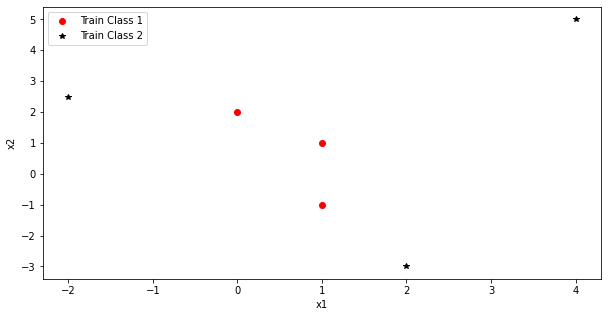

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(class1_x,class1_y,'or' , label = 'Train Class 1')
plt.plot(class2_x,class2_y,'*k' , label = 'Train Class 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [ ]:
np.array(test[0])

array([ 1,  1,  4, -2,  0,  2])

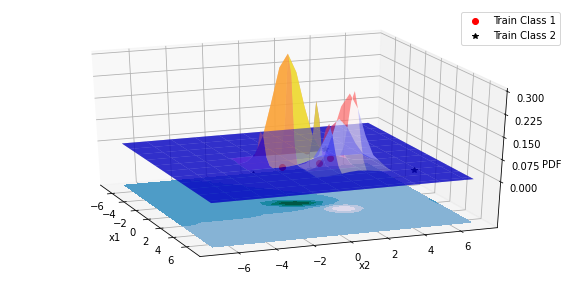

In [ ]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X = np.linspace(-7, 7, 32)
Y = np.linspace(-7, 7, 32)
X, Y = np.meshgrid(X, Y)

XY = np.empty(X.shape + (2,))
XY[:, :, 0] = X
XY[:, :, 1] = Y


def multivariate_gaussian(value, meu, sigma):
   
    divide_term = 1/ (np.sqrt((2*np.pi)**2 * (np.linalg.det(sigma))))
    exp_term = 0.5 * np.einsum('...k,kl,...l->...', value-meu, np.linalg.inv(sigma), value-meu)
    normal_dist = divide_term * np.exp(-exp_term)
    return normal_dist

'''
    divide_term =  1 / (((2 * pi) ** (D/2)) * ( (np.linalg.det(sigma)**(1/2)) ))  
    exp_term = -0.5 * np.matmul((pos - meu) , np.linalg.inv(sigma), (pos - meu))
    normal_dist = divide_term * (np.exp(exp_term))
    return normal_dist
'''
Z1 = multivariate_gaussian(XY, meu1, sigma1)
Z2 = multivariate_gaussian(XY, meu2, sigma2)


fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')

db = Z1-Z2

plt.plot(class1_x,class1_y,'or' , label = 'Train Class 1')
plt.plot(class2_x,class2_y,'*k' , label = 'Train Class 2')


ax.plot_surface(X, Y, Z1, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.plasma, alpha= .7)
ax.plot_surface(X, Y, Z2, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.bwr, alpha= .4)
ax.contourf(X, Y, db, zdir='z', offset=-0.15, cmap=cm.PuBuGn)

plt.xlabel('x1')
plt.ylabel('x2')

ax.legend()

ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.3,5))
ax.view_init(27, -21)
ax.set_zlabel('PDF')

plt.show()
